<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/05-Weather/Nb_05_Wthr_model_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (1).csv


In [25]:
!pip install tensorflow

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [27]:
df = pd.read_csv('forestfires.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [29]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [30]:
missing_vals=df.isnull().sum()
missing_vals

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


In [31]:
X = df.drop(['month','day','area'],axis=1)
y = df['area']
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [32]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

# XG Boost

XGBoost Regressor – Test Results
RMSE: 108.7174
MAE : 26.6920
R²  : -0.0027


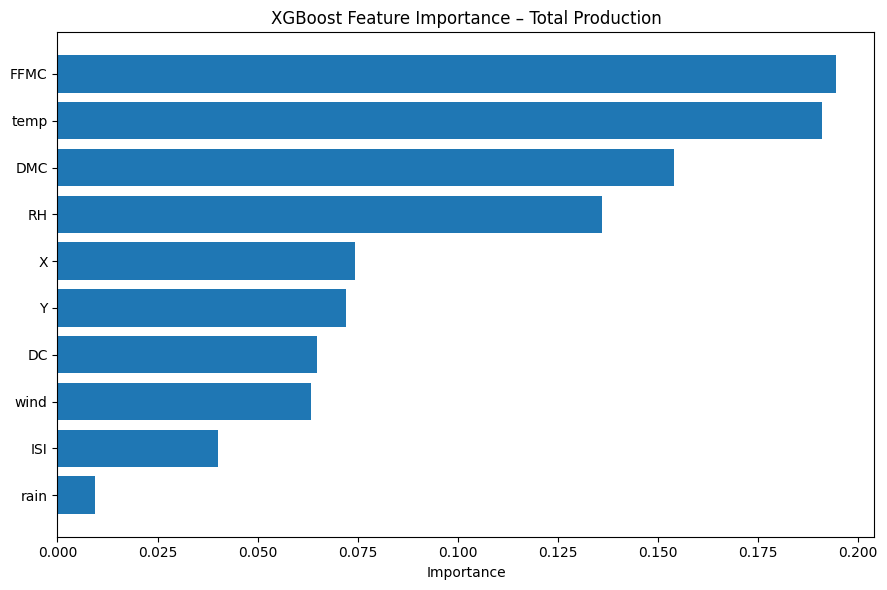

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor

target = 'area'

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# XGBoost Regressor
# ==============================
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("XGBoost Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance – Total Production")
plt.tight_layout()
plt.show()

# Random Forest

Random Forest Regressor – Test Results
RMSE: 108.8572
MAE : 25.9247
R²  : -0.0053


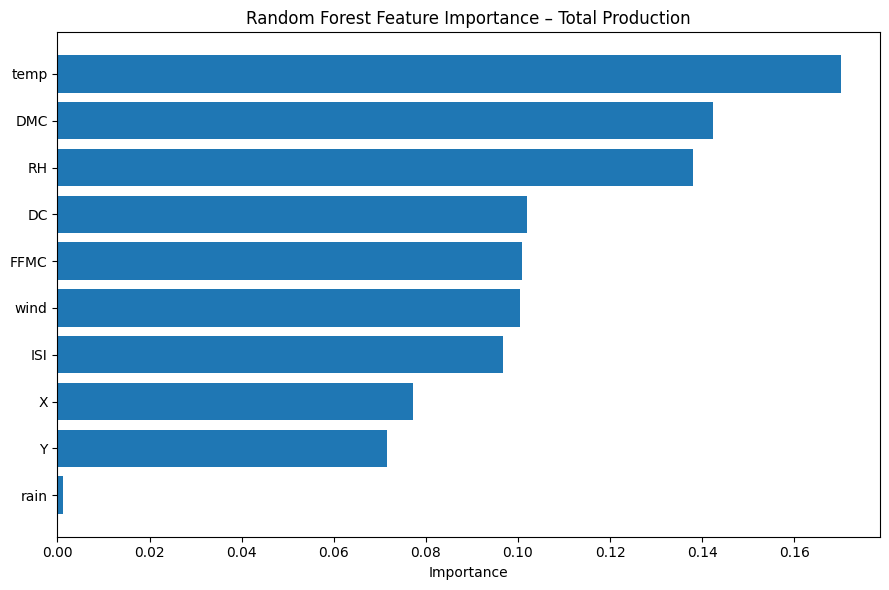

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

target = 'area'

# ==============================
# Split features and target
# ==============================
X = numeric_df.drop(target, axis=1)
y = numeric_df[target]


# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# Random Forest Regressor
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
y_pred = rf_model.predict(X_test)


# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Feature Importance Plot
# ==============================
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance – Total Production")
plt.tight_layout()
plt.show()

# CNN

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

import numpy as np

# ------------------------------
# Prepare Dataset
# ------------------------------
class WeatherDataset(Dataset):
    target = 'area'
    def __init__(self, df):
        self.X = df.drop(target, axis=1).values.astype(np.float32)
        self.y = df[target].values.astype(np.float32).reshape(-1, 1)

        # Add channel dimension for CNN: (samples, channels, features)
        self.X = np.expand_dims(self.X, axis=1)  # channels=1

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), torch.tensor(self.y[idx])


dataset = WeatherDataset(numeric_df)

# Train-test split: 80/20
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

# ------------------------------
# Define CNN Model
# ------------------------------
class TabularCNN(nn.Module):
    def __init__(self, num_features):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=2)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear((num_features - 2) * 32, 64)  # adjust based on conv output
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


num_features = numeric_df.drop(target, axis=1).shape[1]
model = TabularCNN(num_features)

# ------------------------------
# Loss & Optimizer
# ------------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Train Loop
# ------------------------------
epochs = 200
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


# ------------------------------
# Evaluation
# ------------------------------
model.eval()
y_preds, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_preds.append(outputs.numpy())
        y_true.append(y_batch.numpy())

y_preds = np.vstack(y_preds)
y_true = np.vstack(y_true)

rmse = np.sqrt(np.mean((y_true - y_preds)**2))
mae = np.mean(np.abs(y_true - y_preds))
r2 = 1 - np.sum((y_true - y_preds)**2) / np.sum((y_true - np.mean(y_true))**2)

print("\nCNN Regression Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Epoch [20/200], Loss: 2001.7730
Epoch [40/200], Loss: 1949.6770
Epoch [60/200], Loss: 1927.6916
Epoch [80/200], Loss: 1869.4819
Epoch [100/200], Loss: 1810.9231
Epoch [120/200], Loss: 1660.7712
Epoch [140/200], Loss: 1422.9975
Epoch [160/200], Loss: 1110.5356
Epoch [180/200], Loss: 834.3091
Epoch [200/200], Loss: 799.8592

CNN Regression Test Results
RMSE: 136.6812
MAE : 37.0106
R²  : -0.5594


# SVM

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [37]:
# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# SVR Model
# -----------------------------
svr_model = SVR(
    kernel='rbf',    # radial basis function (non-linear)
    C=100,           # regularization
    epsilon=0.1,     # insensitive loss
    gamma='scale'    # automatic gamma
)

# Train
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svr_model.predict(X_test_scaled)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR Regression – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

SVR Regression – Test Results
RMSE: 110.0824
MAE : 20.4640
R²  : -0.0280


Decision Tree Regressor – Test Results
RMSE: 111.6450
MAE : 24.0013
R²  : -0.0574


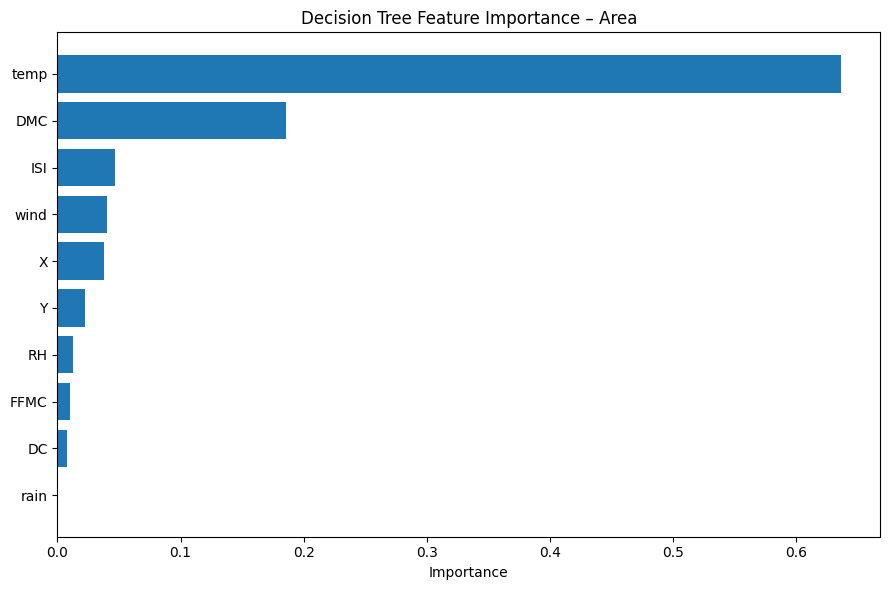

In [38]:
from sklearn.tree import DecisionTreeRegressor

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# Decision Tree Regressor
# -----------------------------
dt_model = DecisionTreeRegressor(
    max_depth=None,        # can tune for overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train
dt_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

# -----------------------------
# Feature Importance Plot
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance')

plt.figure(figsize=(9, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance – Area")
plt.tight_layout()
plt.show()

# EBM

In [39]:
!pip install interpret

In [40]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

Explainable Boosting Regressor – Test Results
RMSE: 108.6075
MAE : 24.1591
R²  : -0.0007


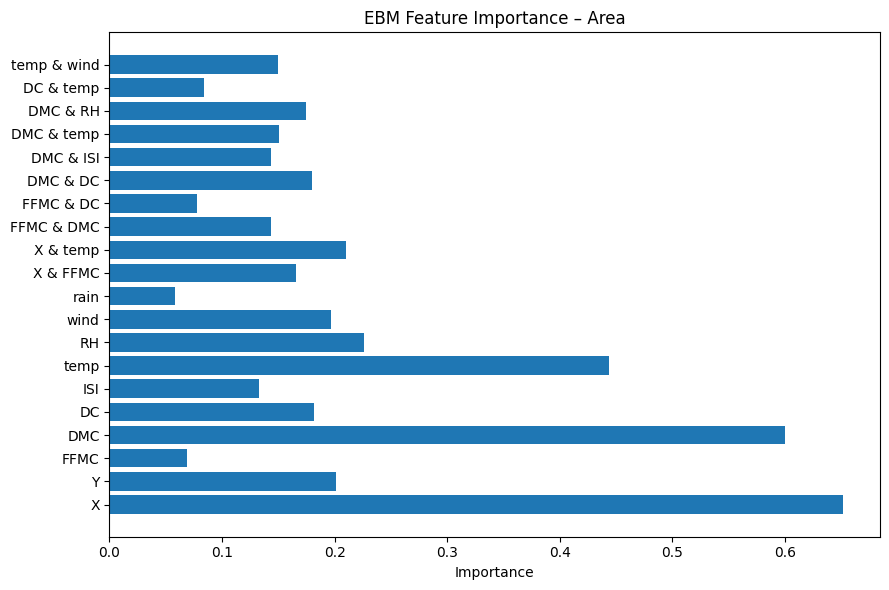

In [41]:
# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# ==============================
# EBM Model
# ==============================
ebm = ExplainableBoostingRegressor(
    random_state=42,
    max_bins=256,
    interactions=10
)

# Train
ebm.fit(X_train, y_train)


# ==============================
# Predictions
# ==============================
test_pred = ebm.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("Explainable Boosting Regressor – Test Results")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")


# ==============================
# Global Explanation (EBM)
# ==============================
global_exp = ebm.explain_global()
show(global_exp)


# ==============================
# Feature Importance Plot (Static)
# ==============================
importances = global_exp.data()['scores']
features = global_exp.data()['names']

plt.figure(figsize=(9, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("EBM Feature Importance – Area")
plt.tight_layout()
plt.show()

# GAM - Generalized additive model

In [42]:
!pip install pygam

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

GAM (Generalized Additive Model) – Area
RMSE: 113.3466
MAE : 33.3329
R²  : -0.0899

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     82.7487
Link Function:                     IdentityLink Log Likelihood:                                 -2115.1847
Number of Samples:                          413 AIC:                                             4397.8667
                                                AICc:                                            4441.1116
                                                GCV:                                             3103.6154
                                                Scale:                                             44.8245
                                                Pseudo R-Squ

/tmp/ipython-input-1660073566.py:46: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




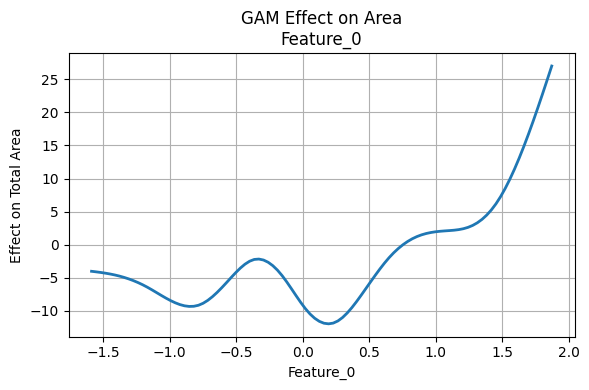

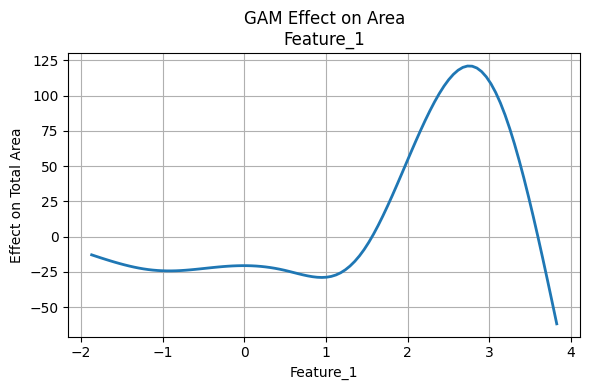

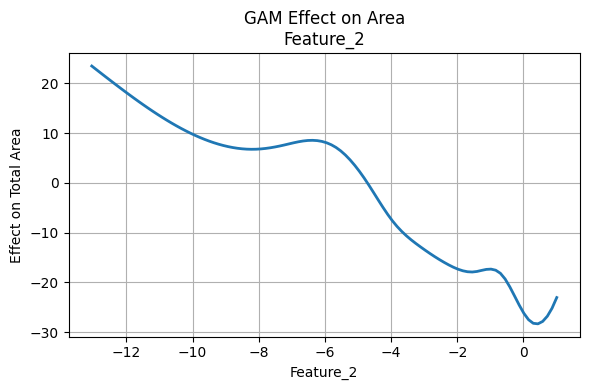

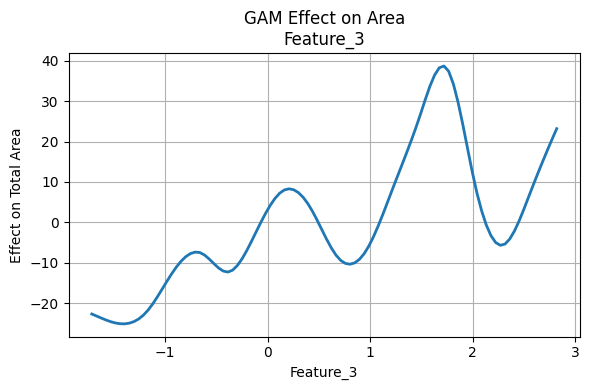

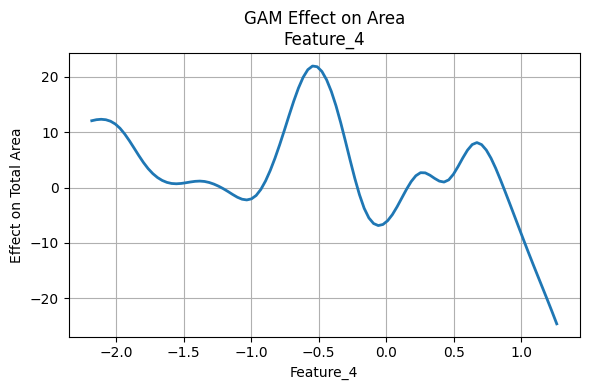

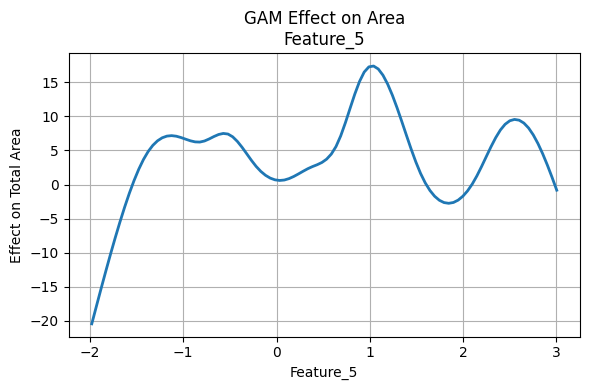

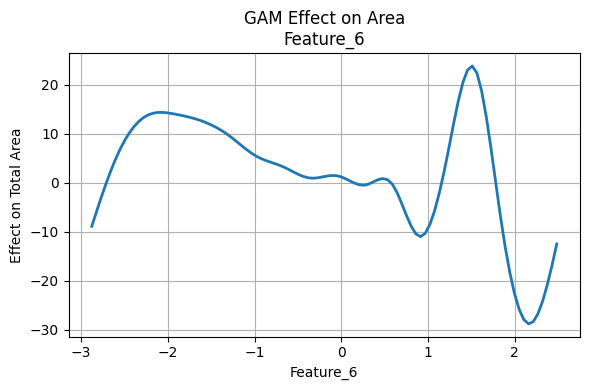

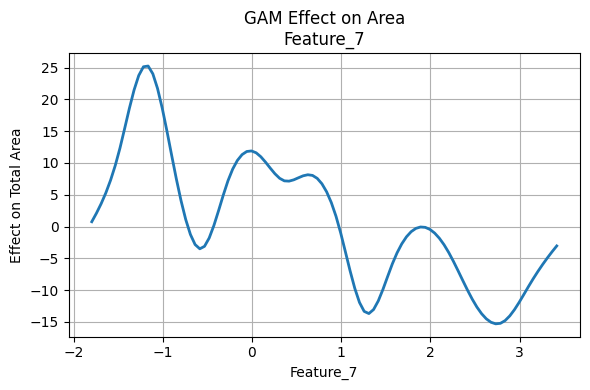

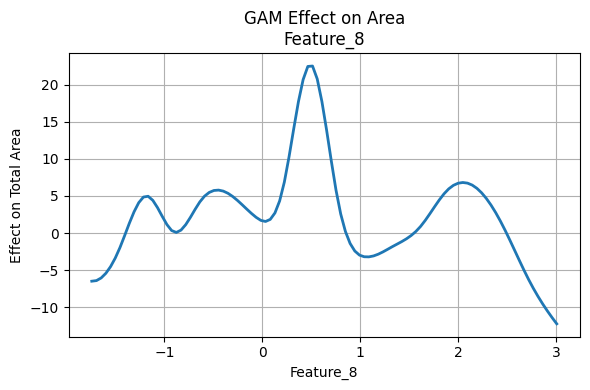

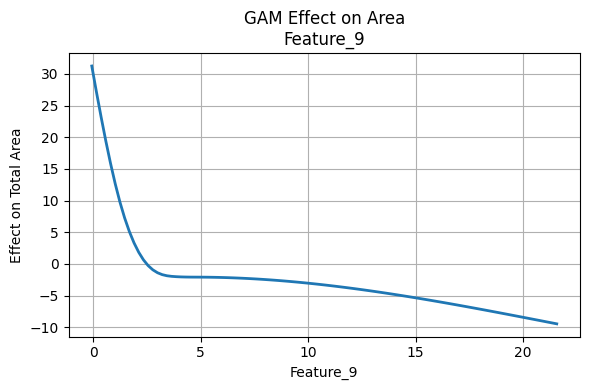

In [51]:
if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Train-test split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM model
# ==============================
# Create terms properly
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

gam = LinearGAM(terms).fit(X_train, y_train)

# ==============================
# Predict
# ==============================
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("GAM (Generalized Additive Model) – Area")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# ==============================
# Statistical Summary
# ==============================
gam.summary()

# ==============================
# Feature Effect / Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):
    plt.figure(figsize=(6, 4))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), linewidth=2)
    plt.title(f"GAM Effect on Area\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Effect on Total Area")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
/tmp/ipython-input-3934592620.py:65: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 





GAM (Generalized Additive Model) – Area
Train RMSE : 44.4098
Test  RMSE : 108.5997
MAE        : 24.7609
R²         : -0.0005

Model Summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.3272
Link Function:                     IdentityLink Log Likelihood:                                 -2152.9539
Number of Samples:                          413 AIC:                                             4346.5621
                                                AICc:                                            4348.7758
                                                GCV:                                             2258.4649
                                                Scale:                                             45.4869
  

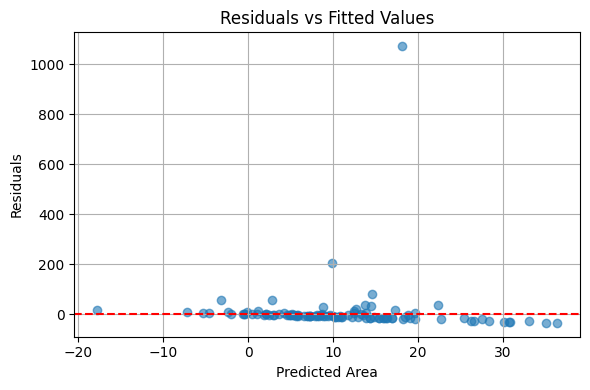

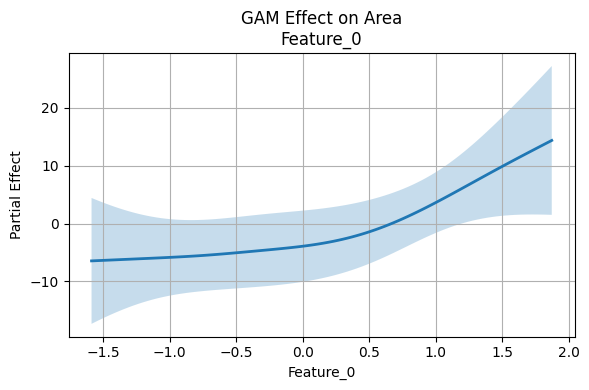

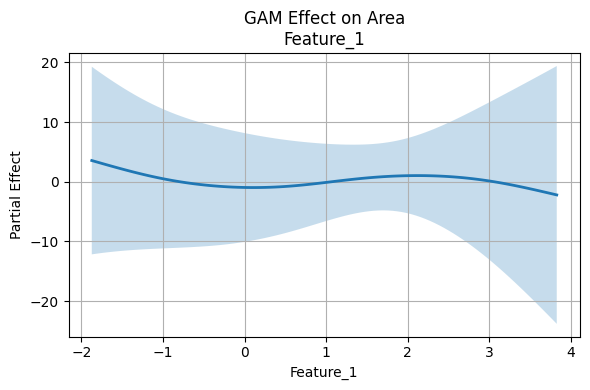

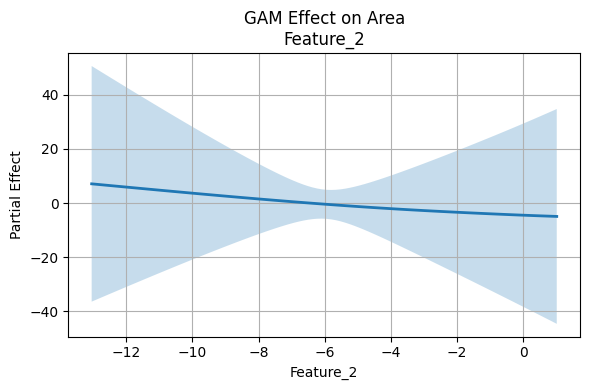

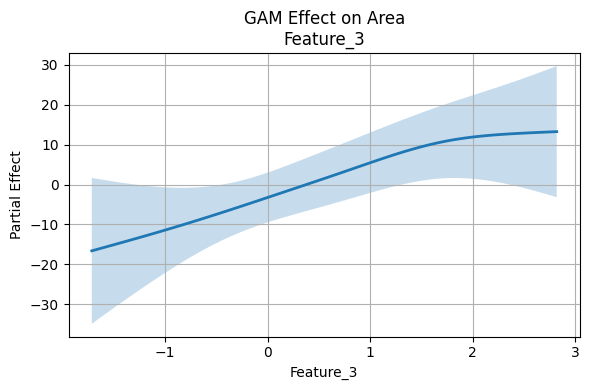

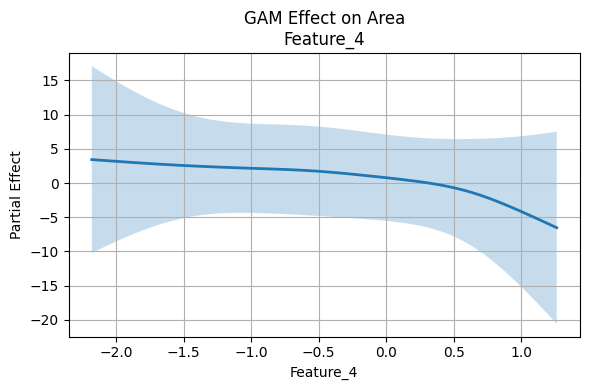

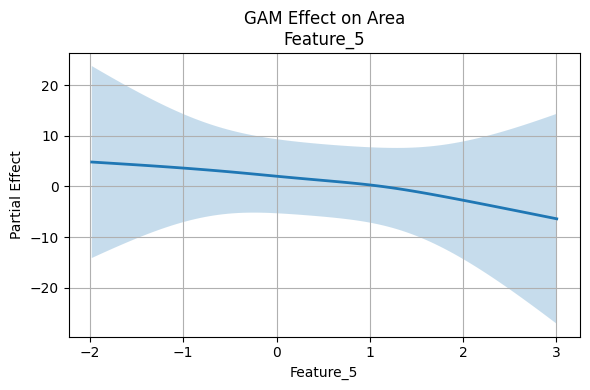

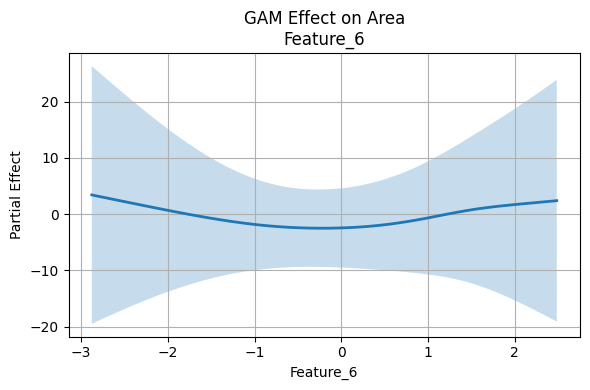

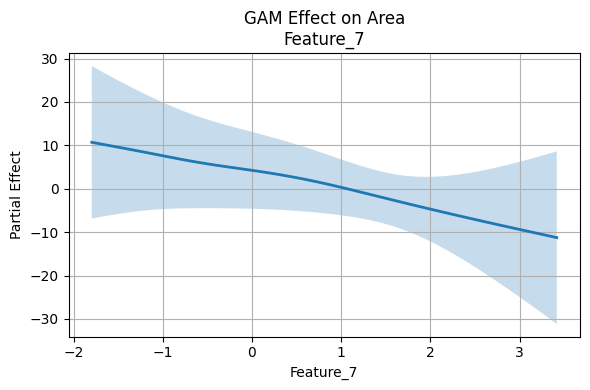

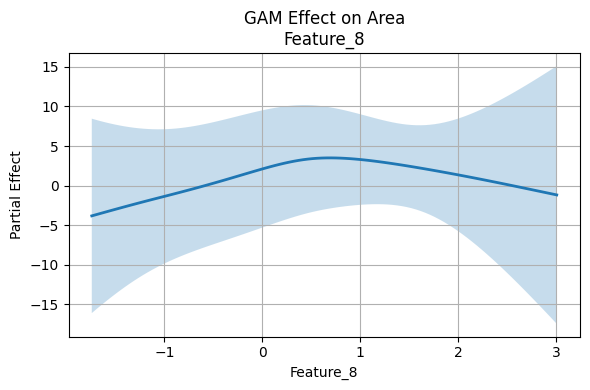

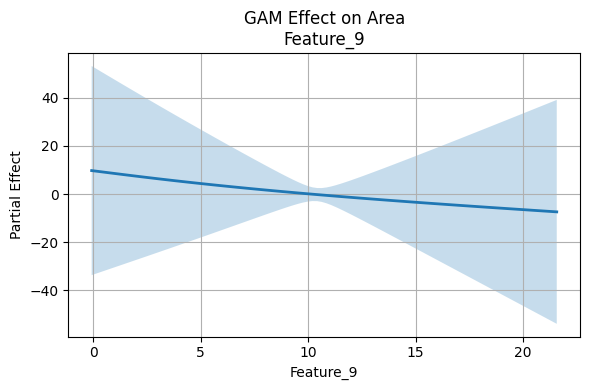


Optimal lambda values per term:
[[np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)], [np.float64(1000.0)]]


In [52]:
# ==============================
# Load / Prepare Data
# ==============================
# X can be pandas DataFrame OR numpy array
# y can be pandas Series OR numpy array

if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values
else:
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

y = y.values if hasattr(y, "values") else y

# ==============================
# Feature Scaling
# ==============================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ==============================
# Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# Build GAM Terms
# ==============================
terms = s(0, n_splines=20)
for i in range(1, X_train.shape[1]):
    terms += s(i, n_splines=20)

# ==============================
# Train GAM (correct λ handling)
# ==============================
gam = LinearGAM(terms)
gam.gridsearch(X_train, y_train)

# ==============================
# Predictions
# ==============================
train_pred = gam.predict(X_train)
test_pred = gam.predict(X_test)

# ==============================
# Evaluation
# ==============================
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, test_pred))
mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print("\nGAM (Generalized Additive Model) – Area")
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test  RMSE : {test_rmse:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"R²         : {r2:.4f}")

# ==============================
# Model Summary
# ==============================
print("\nModel Summary:")
gam.summary()

# ==============================
# Residual Diagnostics
# ==============================
residuals = y_test - test_pred

plt.figure(figsize=(6, 4))
plt.scatter(test_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Area")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# Partial Dependence Plots
# ==============================
for i, feature in enumerate(feature_names):

    plt.figure(figsize=(6, 4))

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.plot(XX[:, i], pdep, linewidth=2)
    plt.fill_between(
        XX[:, i],
        confi[:, 0],
        confi[:, 1],
        alpha=0.25
    )

    plt.title(f"GAM Effect on Area\n{feature}")
    plt.xlabel(feature)
    plt.ylabel("Partial Effect")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ==============================
# Optimal lambda values
# ==============================
print("\nOptimal lambda values per term:")
print(gam.lam)
